In [1]:
import json
import csv
import os
import openpyxl
import pandas as pd
import re
import csv 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargamos un Dataset para entender su estructura
df = pd.read_parquet('./Datasets/AutosdeAlquiler/Data Uber 2022/fhv_tripdata_2022-01.parquet')

# Mostrar el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143691 entries, 0 to 1143690
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1143691 non-null  object        
 1   pickup_datetime         1143691 non-null  datetime64[us]
 2   dropOff_datetime        1143691 non-null  datetime64[us]
 3   PUlocationID            267997 non-null   float64       
 4   DOlocationID            1012291 non-null  float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1143691 non-null  object        
dtypes: datetime64[us](2), float64(2), object(3)
memory usage: 61.1+ MB
None


In [4]:
#Definimos el directorio de los archivos y el tratamiento que aplicaremos:

input_dir = './Datasets/AutosdeAlquiler/Data Uber 2022/'  # Directorio donde se encuentran los archivos Parquet
output_dir = './ProcessedDatasets/Alquileres-2022'  # Directorio donde se guardarán los archivos procesados

# Nos aseguramos de que el directorio de salida existe y este ok
os.makedirs(output_dir, exist_ok=True)

# Listamos los archivos Parquet
parquet_files = [f for f in os.listdir(input_dir) if f.endswith('.parquet') and f.startswith('fhv_tripdata_2022')]


In [5]:
# Aplicamos el tratamiento a cada archivo y lo guardarmos

for file in parquet_files:
    file_path = os.path.join(input_dir, file)
    
    # Cargar el archivo Parquet
    df = pd.read_parquet(file_path)
    
    # Eliminar las filas con valores nulos en PUlocationID y DOlocationID
    df = df.dropna(subset=['PUlocationID', 'DOlocationID'])
    
    # Eliminar la columna SR_Flag
    df = df.drop(columns=['SR_Flag', 'Affiliated_base_number'])
    
    # Guardar el DataFrame procesado en un nuevo archivo Parquet
    output_file_path = os.path.join(output_dir, file)
    df.to_parquet(output_file_path, index=False)
    
    print(f'Processed and saved: {output_file_path}')


Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-01.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-02.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-03.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-04.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-06.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-07.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-08.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-09.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-11.parquet
Processed and saved: ./ProcessedDatasets/Alquileres-2022\fhv_tripdata_2022-12.parquet


In [8]:
# Visualizamos como quedaron 

output_dir = './ProcessedDatasets/Alquileres-2022'  # Directorio donde se guardaron los archivos procesados

# Listamos los archivos Parquet procesados
processed_parquet_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.parquet')]

# Leemos y concatenamos todos los archivos Parquet en un único DataFrame
df_all = pd.concat([pd.read_parquet(file) for file in processed_parquet_files], ignore_index=True)

# Mostrar información del DataFrame concatenado
print(df_all.info())

# Mostrar las primeras filas del DataFrame concatenado
print(df_all.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791400 entries, 0 to 2791399
Data columns (total 5 columns):
 #   Column                Dtype         
---  ------                -----         
 0   dispatching_base_num  object        
 1   pickup_datetime       datetime64[us]
 2   dropOff_datetime      datetime64[us]
 3   PUlocationID          float64       
 4   DOlocationID          float64       
dtypes: datetime64[us](2), float64(2), object(1)
memory usage: 106.5+ MB
None
  dispatching_base_num     pickup_datetime    dropOff_datetime  PUlocationID  \
0               B00171 2022-01-01 00:32:00 2022-01-01 00:58:00          66.0   
1               B00254 2022-01-01 00:33:51 2022-01-01 00:46:18         138.0   
2               B00254 2022-01-01 00:22:50 2022-01-01 00:55:18         132.0   
3               B00254 2022-01-01 00:22:08 2022-01-01 00:31:23         236.0   
4               B00445 2022-01-01 00:55:21 2022-01-01 01:13:52         131.0   

   DOlocationID  
0         198.0  

In [9]:
df_all

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID
0,B00171,2022-01-01 00:32:00,2022-01-01 00:58:00,66.0,198.0
1,B00254,2022-01-01 00:33:51,2022-01-01 00:46:18,138.0,262.0
2,B00254,2022-01-01 00:22:50,2022-01-01 00:55:18,132.0,113.0
3,B00254,2022-01-01 00:22:08,2022-01-01 00:31:23,236.0,229.0
4,B00445,2022-01-01 00:55:21,2022-01-01 01:13:52,131.0,252.0
...,...,...,...,...,...
2791395,B03380,2022-12-31 23:00:35,2022-12-31 23:12:25,80.0,255.0
2791396,B03380,2022-12-31 23:02:35,2022-12-31 23:08:15,142.0,239.0
2791397,B03380,2022-12-31 23:14:22,2022-12-31 23:31:24,238.0,163.0
2791398,B03380,2022-12-31 23:38:45,2022-12-31 23:59:44,161.0,68.0


In [10]:
# Convertimos las columnas de fecha y hora a formato datetime
df_all['pickup_datetime'] = pd.to_datetime(df_all['pickup_datetime'])
df_all['dropOff_datetime'] = pd.to_datetime(df_all['dropOff_datetime'])


In [11]:
# Creamos columnas separadas para fecha de pickup
df_all['pickup_date'] = df_all['pickup_datetime'].dt.date

In [12]:
# Calculamos el tiempo total de los viajes
df_all['trip_duration'] = df_all['dropOff_datetime'] - df_all['pickup_datetime']


In [13]:
# Agrupamos por dispatching_base_num y pickup_date y sumamos el tiempo total de viajes por grupo
grouped_df = df_all.groupby(['dispatching_base_num', 'pickup_date']).agg({
    'pickup_datetime': 'count',
    'trip_duration': 'sum'
}).rename(columns={'pickup_datetime': 'total_trips'})

#### Mapa de Calor de Viajes por Hora del Día

[Text(0, 0.5, 'Monday'),
 Text(0, 1.5, 'Tuesday'),
 Text(0, 2.5, 'Wednesday'),
 Text(0, 3.5, 'Thursday'),
 Text(0, 4.5, 'Friday'),
 Text(0, 5.5, 'Saturday'),
 Text(0, 6.5, 'Sunday')]

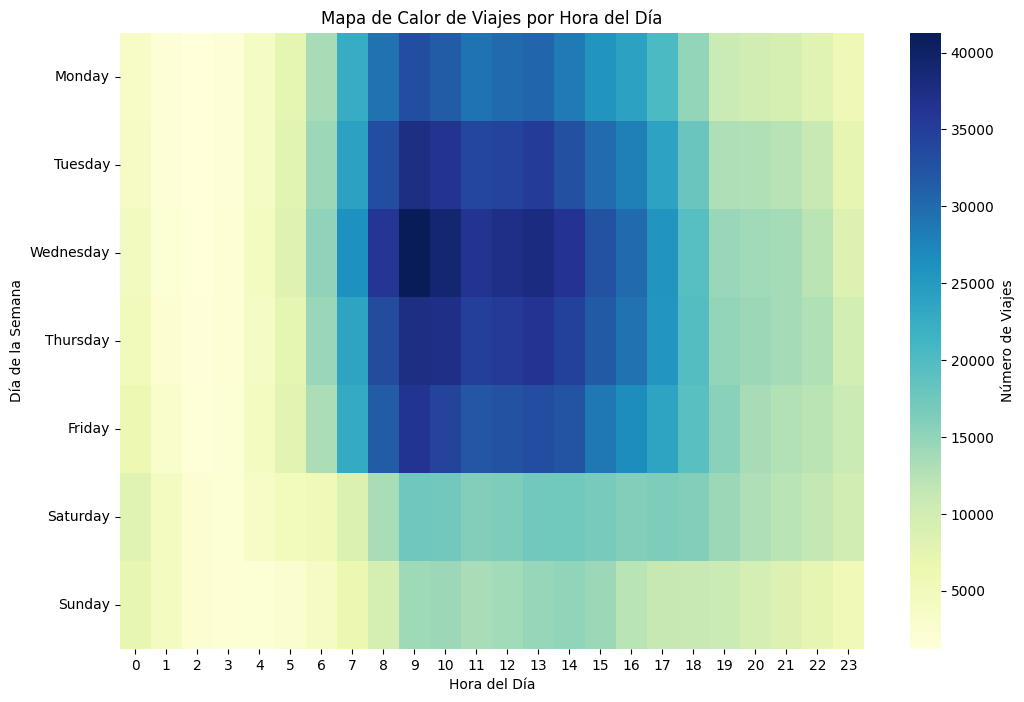

In [14]:
# Extraemos la hora de pickup
df_all['pickup_hour'] = df_all['pickup_datetime'].dt.hour

# Agrupamos por día de la semana y hora de pickup
heatmap_data = df_all.groupby([df_all['pickup_datetime'].dt.weekday, 'pickup_hour']).size().unstack().fillna(0)

# Creamos una lista con los nombres de los días de la semana
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Graficar mapa de calor
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Número de Viajes'})
ax.set_title('Mapa de Calor de Viajes por Hora del Día')
ax.set_xlabel('Hora del Día')
ax.set_ylabel('Día de la Semana')
ax.set_yticklabels(days_of_week, rotation=0)  # Establecer etiquetas de los días de la semana

#### Distribución de la Duración de los Viajes por Mes 

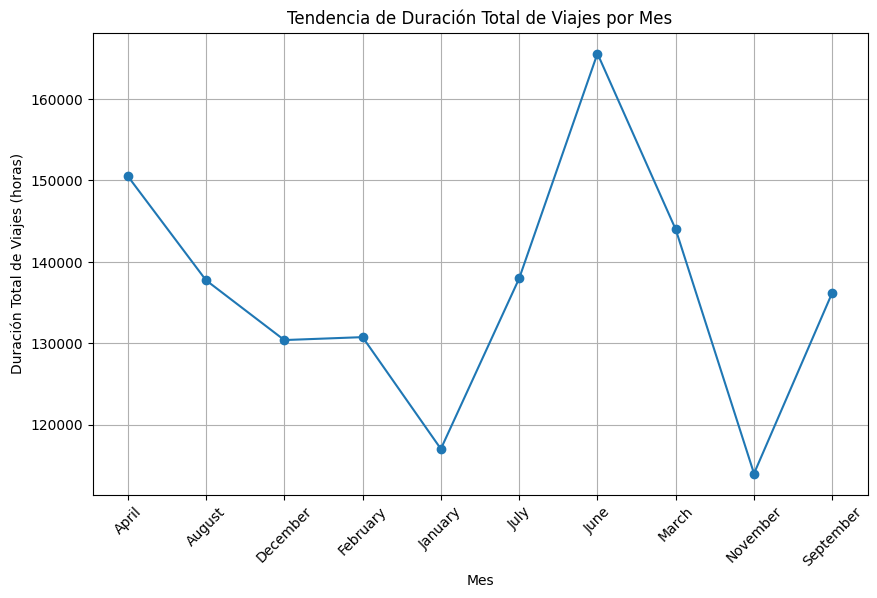

In [15]:
# Calcular la duración total de los viajes en horas
df_all['trip_duration_hours'] = (df_all['dropOff_datetime'] - df_all['pickup_datetime']).dt.total_seconds() / 3600

# Extraer el mes de la fecha de recogida
df_all['pickup_month'] = df_all['pickup_datetime'].dt.month_name()

# Agrupar por mes y sumar la duración total de los viajes en horas
monthly_duration = df_all.groupby('pickup_month')['trip_duration_hours'].sum()

# Graficar la tendencia de duración total de los viajes por mes
plt.figure(figsize=(10, 6))
plt.plot(monthly_duration.index, monthly_duration.values, marker='o')
plt.title('Tendencia de Duración Total de Viajes por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Total de Viajes (horas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()